# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

df = pd.read_csv('data/human_body_temperature.csv')

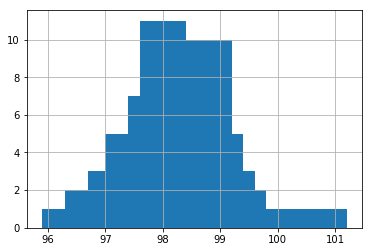

In [3]:
# Your work here.
# 1. Plot to see whether the distribution is normal
unique, counts = np.unique(df.temperature, return_counts=True)
plt.bar(unique, counts)
plt.grid()

#### Answer for Q1: 

The distribution of body temperature can be suggested to be normal from the above plot. 

In [4]:
# 2. Calculate the sample size
print('The sample size is: {}'.format(len(df.temperature)))

The sample size is: 130


#### Answer for Q2: 

This is a relatively large sample size as we can usually use CLT for sample size larger than 30. 

The observations should be independent because one person's body temperature does not relate to other people's body temperature.

In [49]:
# 3.Calculating the Z statistic and T statistic 
print('The sample mean is: %.1f' % np.mean(df.temperature))

print('Null Hypothesis: the expected value of the sample is equal to the given population mean')

z_score, p_value_2 = ztest(df.temperature, value=98.6)
print('Z-test score: %.2f  ' % z_score, 'P-value for Z-test: %.8f' %p_value_2)

t_score, p_value = ttest_1samp(df.temperature, 98.6)
print('T-test score: %.2f  ' % t_score, 'P-value for T-test: %.7f' % p_value)

The sample mean is: 98.2
Null Hypothesis: the expected value of the sample is equal to the given population mean
Z-test score: -5.45   P-value for Z-test: 0.00000005
T-test score: -5.45   P-value for T-test: 0.0000002


#### Answers for Q3: 

The true population mean is not really 98.6 degrees F. Let null hypothesis be that the expected value of the sample is equal to the given population mean, suggest null hypothesis is true and calculate the z-test p value. From the above, it is obvious that the p-value is very low (much lower than the usual significant level 5%) so the null hypothesis should be rejected. 

I used a one-sample test because the situation here is not comparing two different samples' mean but comparing the sample mean with the suggested population mean. 

In this situation, it is appropriate to use the z statistic because the sample size is large enough to suggest a normal distribution for sampling distribution. However, t statistic might also be appropriate because it can be used under the situation that population standard deviation is unknown. 

Using t-test gives a relatively larger p value because it would suggest a t distribution and t distribution estimates a larger variance of the sampling distribution than the normal distribution.

In [50]:
# 4. Randomly choose 10 samples from the data and calculate the Z and T statistic
np.random.seed(199)
small_sample = np.random.choice(df.temperature, 10)

z_score, p_value_2 = ztest(small_sample, value=98.6)
print('Z-test score: %.2f  ' % z_score, 'P-value for Z-test: %.4f' %p_value_2)

t_score, p_value = ttest_1samp(small_sample, 98.6)
print('T-test score: %.2f  ' % t_score, 'P-value for T-test: %.4f' % p_value)

Z-test score: -1.81   P-value for Z-test: 0.0710
T-test score: -1.81   P-value for T-test: 0.1045


#### Answer for Q4: 

T-test is the correct one to use in this case. 

The difference of p-values for z-test and t-test is significant now comparing with the difference for using the whole 130 samples of the data. In this case, t statistic is appropriate to use since it gives a larger p value and is more strict with the confidence in rejecting the null hypothesis. 

Hence, the application of t statistic is for relatively smaller sample size and the application of z statistic is for relatively larger sample size.

In [20]:
# Calculate the margin of error and the confidence interval
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
lower, upper = norm.interval(0.95, loc=mu, scale=sigma)
margin_of_error = (upper - mu)
print('The temperature out of this range (%2.2f, %2.2f) is considered abnormal. The margin of error is %.2f.' 
      %(lower, upper, margin_of_error))

The temperature out of this range (96.82, 99.68) is considered abnormal. The margin of error is 1.43.


#### Answer for Q5: 

At a temperature that is lower than 96.82 degrees F or higher than 99.68 degrees F, we should consider this person's temperature to be abnormal. The margin of error is 1.43 degrees F. 

In [ ]:
Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [24]:
f_temp = df.temperature[df.gender == 'F']
m_temp = df.temperature[df.gender == 'M']

In [26]:
print(len(f_temp), len(m_temp))

65 65


In [38]:
print('Null Hypothesis: There is no difference between males and females in normal temperature.')

z_score, p_value_2 = ztest(f_temp, m_temp)
print('Z-test score: %.2f  ' % z_score, 'P-value for Z-test: %.4f' % p_value_2)

t_score, p_value = ttest_ind(f_temp, m_temp)
print('T-test score: %.2f  ' % t_score, 'P-value for T-test: %.4f' % p_value)

Null Hypothesis: There is no difference between males and females in normal temperature.
Z-test score: 2.29   P-value for Z-test: 0.0223
T-test score: 2.29   P-value for T-test: 0.0239


#### Answer to Q6: 

I would use z test since the sample size for females and males are both large enough to assume normal distribution. However, since we do not know the standard deviation of the females and males population, we might also use t test. As we can see above, either using z test or t test, the p values are both below 5% significance level. Hence, we can reject the null hypothesis and say that there might be a significant difference between females and males in normal temperature. 